In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from math import *
from bandits import *

Bandit born


#### Bandit Setting

In [310]:
#As in Paper 1
#2 Arms, rho : 0, 1, 5
#Arms = [(1, 2), (5, 10)]
#Special Case
Arms = [(1, 0), (5, 0)]
#Experimental
#Arms = [(1, 1), (5, 10), (10, 10), (15, 10), (20, 10)]
# A - rho : 0, 1.6, 2
#Arms = [(1, 2), (3, 4), (5, 9), (7, 12), (10, 15)]
# # B - rho : 0, 1.6, 2
# Arms = [(1, 1), (5, 15), (10, 4), (11, 10), (15, 15)]
K = len(Arms)
bandit = gaussian_bandit(K, Arms)

#Parameters
#Risk tolerance paameter
rho = 0
#Number of rounds
n = 1000

trials = 10

#Best arm
true_mvs = [var - rho*mean for mean, var in Arms] 
best_arm = np.argmin(true_mvs)
mv_best = true_mvs[best_arm]
true_mvs
best_arm

[0, 0]

0

##### UCB - Risk Neutral

In [316]:
#UCB

var_trials_0 = []
regret_trials_0 = []
cum_regret_trials_0 = []
perc_optimal_trials_0 = []
for trial in range(trials):

    #Sample means and variances
    sample_rewards = [[] for k in range(K)]
    sample_means = [0]*K
    sample_vars = [0]*K
    net_rewards = []
    net_mv = 0
    #mean-variance values
    mvs = [0]*K
    #UCB values
    Bs = [0]*K
    #Number of times each arm is played
    num_played = [0]*K
    #Risk-averse regret
    regret_till_now = 0
    cum_regret_till_now = 0
    regret = []
    cum_regret = []
    perc_optimal = []

    for i in range(K):
        #Pull arm
        reward = bandit.pull_arm(i)
        #Add reward to list of rewards
        sample_rewards[i].append(reward)
        net_rewards.append(reward)
        #Add reward to mean, variance is zero so no need to update
        sample_means[i] = reward
        #Update arm played count
        num_played[i] += 1  
        mvs[i] = sample_vars[i] - rho*sample_means[i]   
        net_mv = np.var(net_rewards) - rho*np.mean(net_rewards)
        #Update regret
        regret_till_now = net_mv - mv_best
        cum_regret_till_now = true_mvs[i] - mv_best
        regret.append(regret_till_now)
        cum_regret.append(cum_regret_till_now)
        perc_optimal.append(num_played[best_arm]/float(i+1)) 

    for t in range(K+1, n+1):
        #Calculate  LCBs
        Bs = [mean - np.sqrt(8*np.log(t)/num) for mean, num in zip(sample_means, num_played)]

        #Pull best arm
        arm_to_pull = np.argmax(Bs)
        reward = bandit.pull_arm(arm_to_pull)
        sample_rewards[arm_to_pull].append(reward)
        net_rewards.append(reward)
        num_played[arm_to_pull] += 1

        #Update means
        sample_means[arm_to_pull] = np.mean(sample_rewards[arm_to_pull])
        sample_vars[arm_to_pull] = np.var(sample_rewards[arm_to_pull])
        mvs[arm_to_pull] = sample_vars[arm_to_pull] - rho*sample_means[arm_to_pull]   
        net_mv = np.var(net_rewards) - rho*np.mean(net_rewards)

        #Update regret
        regret_till_now = net_mv - mv_best
        cum_regret_till_now += true_mvs[arm_to_pull] - mv_best
        regret.append(regret_till_now)
        cum_regret.append(cum_regret_till_now)
        perc_optimal.append(num_played[best_arm]/float(t)) 

    regret_trials_0.append(regret)
    cum_regret_trials_0.append(cum_regret)
    perc_optimal_trials_0.append(perc_optimal)
    var_trials_0.append(np.var(net_rewards))

var_avg_0 = np.mean(var_trials_0)
regret_avg_0 = np.mean(np.array(regret_trials_0), axis = 0)
cum_regret_avg_0 = np.mean(np.array(cum_regret_trials_0), axis = 0)
perc_optimal_avg_0 = np.mean(np.array(perc_optimal_trials_0), axis = 0)
print("Variance", var_avg_0)
print("Regret", regret_avg_0[-1])
print("Cumulative Regret", cum_regret_avg_0[-1])
print("Perc optimal", perc_optimal_avg_0[-1])
print(num_played)  #of the last trial
#print(len(sample_means), sample_means, sample_vars, mvs)

('Variance', 0.015984000000000005)
('Regret', 0.015984)
('Cumulative Regret', 0.0)
('Perc optimal', 0.0010000000000000002)
[1, 999]


### MV - LCB (Paper 1)

In [312]:
#MV-LCB

#delta value
confidence = 1.0/(n**2)
#confidence = 0.00001

var_trials_1 = []
regret_trials_1 = []
cum_regret_trials_1 = []
perc_optimal_trials_1 = []
for trial in range(trials):

    #Sample means and variances
    sample_rewards = [[] for k in range(K)]
    sample_means = [0]*K
    sample_vars = [0]*K
    net_rewards = []
    net_mv = 0
    #mean-variance values
    mvs = [0]*K
    #B values (LCB) - refer paper
    Bs = [0]*K
    #Number of times each arm is played
    num_played = [0]*K
    #Risk-averse regret
    regret_till_now = 0
    cum_regret_till_now = 0
    regret = []
    cum_regret = []
    perc_optimal = []

    for i in range(K):
        #Pull arm
        reward = bandit.pull_arm(i)
        #Add reward to list of rewards
        sample_rewards[i].append(reward)
        net_rewards.append(reward)
        #Add reward to mean, variance is zero so no need to update
        sample_means[i] = reward
        #Update arm played count
        num_played[i] += 1   
        #Update MV
        mvs[i] = -rho*reward
        net_mv = np.var(net_rewards) - rho*np.mean(net_rewards)
        #Update regret
        regret_till_now = net_mv - mv_best
        cum_regret_till_now += true_mvs[i] - mv_best
        cum_regret_till_now = 0
        regret.append(regret_till_now)
        cum_regret.append(cum_regret_till_now)
        perc_optimal.append(num_played[best_arm]/float(i+1)) 

    for t in range(K+1, n+1):
        #Calculate  LCBs
        Bs = [mv - (5+rho)*np.sqrt(np.log(1.0/confidence)/(2*num)) for mv, num in zip(mvs, num_played)]
        #print(Bs)

        #Pull best arm
        arm_to_pull = np.argmin(Bs)
        reward = bandit.pull_arm(arm_to_pull)
        sample_rewards[arm_to_pull].append(reward)
        net_rewards.append(reward)
        num_played[arm_to_pull] += 1

        #Update means and variances and mean-variance
        sample_means[arm_to_pull] = np.mean(sample_rewards[arm_to_pull])
        sample_vars[arm_to_pull] = np.var(sample_rewards[arm_to_pull])
        mvs[arm_to_pull] = sample_vars[arm_to_pull] - rho*sample_means[arm_to_pull]
        net_mv = np.var(net_rewards) - rho*np.mean(net_rewards)

        #Update regret
        regret_till_now = net_mv - mv_best
        cum_regret_till_now += true_mvs[arm_to_pull] - mv_best
        regret.append(regret_till_now)
        cum_regret.append(cum_regret_till_now)
        perc_optimal.append(num_played[best_arm]/float(t)) 

    regret_trials_1.append(regret)
    cum_regret_trials_1.append(cum_regret)
    perc_optimal_trials_1.append(perc_optimal)
    var_trials_1.append(np.var(net_rewards))

var_avg_1 = np.mean(var_trials_1)
regret_avg_1 = np.mean(np.array(regret_trials_1), axis = 0)
cum_regret_avg_1 = np.mean(np.array(cum_regret_trials_1), axis = 0)
perc_optimal_avg_1 = np.mean(np.array(perc_optimal_trials_1), axis = 0)
print("Variance", var_avg_1)
print("Regret", regret_avg_1[-1])
print("Cumulative Regret", cum_regret_avg_1[-1])
print("Perc optimal", perc_optimal_avg_1[-1])
print(num_played)  #of the last trial
# print(cum_regret_avg_1)

('Variance', 4.0)
('Regret', 4.0)
('Cumulative Regret', 0.0)
('Perc optimal', 0.5)
[500, 500]


### ExpExp (Paper 1)

In [313]:
tau = int(np.ceil(np.power(n/14., 2./3.)))
print(tau)

var_trials_2 = []
regret_trials_2 = []
cum_regret_trials_2 = []
perc_optimal_trials_2 = []
for trial in range(trials):
    
    #Sample means and variances
    sample_rewards = [[] for k in range(K)]
    sample_means = [0]*K
    sample_vars = [0]*K
    net_rewards = []
    net_mv = 0
    #mean-variance values
    mvs = [0]*K
    #Number of times each arm is played
    num_played = [0]*K
    #Risk-averse regret
    regret_till_now = 0
    cum_regret_till_now = 0
    regret = []
    cum_regret = []
    perc_optimal = []


    for i in range(K):
        for j in range(tau):
            #Pull arm
            reward = bandit.pull_arm(i)
            #Add reward to list of rewards
            sample_rewards[i].append(reward)
            net_rewards.append(reward)
            #Mean
            sample_means[i] = np.mean(sample_rewards[i])
            #Variance
            sample_vars[i] = np.var(sample_rewards[i])
            #Update arm played count
            num_played[i] += 1   
            #Update MV
            mvs[i] = sample_vars[i] - rho*sample_means[i]   
            net_mv = np.var(net_rewards) - rho*np.mean(net_rewards)
            #Update regret
            regret_till_now = net_mv - mv_best
            cum_regret_till_now += true_mvs[i] - mv_best
            regret.append(regret_till_now)
            cum_regret.append(cum_regret_till_now)
            perc_optimal.append(num_played[best_arm]/float(i*tau+j+1)) 
            

    exploit_arm = np.argmin(mvs)
    for i in range(tau*K+1, n+1):
        reward = bandit.pull_arm(exploit_arm)
        sample_rewards[exploit_arm].append(reward)
        net_rewards.append(reward)
        sample_means[exploit_arm] = np.mean(sample_rewards[exploit_arm])
        sample_vars[exploit_arm] = np.var(sample_rewards[exploit_arm])
        num_played[exploit_arm] += 1

        mvs[exploit_arm] = sample_vars[exploit_arm] - rho*sample_means[exploit_arm]
        net_mv = np.var(net_rewards) - rho*np.mean(net_rewards)
    
        #Update regret
        regret_till_now = net_mv - mv_best
        cum_regret_till_now += true_mvs[exploit_arm] - mv_best
        regret.append(regret_till_now)
        cum_regret.append(cum_regret_till_now)
        perc_optimal.append(num_played[best_arm]/float(i))

    regret_trials_2.append(regret)
    cum_regret_trials_2.append(cum_regret)
    perc_optimal_trials_2.append(perc_optimal)    
    var_trials_2.append(np.var(net_rewards))

var_avg_2 = np.mean(var_trials_2)
regret_avg_2 = np.mean(np.array(regret_trials_2), axis = 0)
cum_regret_avg_2 = np.mean(np.array(cum_regret_trials_2), axis = 0)
perc_optimal_avg_2 = np.mean(np.array(perc_optimal_trials_2), axis = 0)
print("Variance", var_avg_2)
print("Regret", regret_avg_2[-1])
print("Cumulative Regret", cum_regret_avg_2[-1])
print("Perc optimal", perc_optimal_avg_2[-1])
print(num_played)  #of the last trial
# print(cum_regret_avg_2)

18
('Variance', 0.28281599999999996)
('Regret', 0.28281599999999996)
('Cumulative Regret', 0.0)
('Perc optimal', 0.982)
[982, 18]


### Eliminative MV-UCB (Paper 6)

In [314]:
#Eliminative MV-UCB

#b - refer paper
b = 0.1

var_trials_3 = []
regret_trials_3 = []
cum_regret_trials_3 = []
perc_optimal_trials_3 = []
for trial in range(trials):
    
    #All arms in the set initially
    S = set(range(K))

    #Sample means and variances
    sample_rewards = [[] for k in range(K)]
    sample_means = [0]*K
    sample_vars = [0]*K
    net_rewards = []
    net_mv = 0
    #mean-variance values
    mvs = [0]*K
    #Number of times each arm is played
    num_played = [0]*K
    #Risk-averse regret
    regret_till_now = 0
    cum_regret_till_now = 0
    regret = []
    cum_regret = []
    perc_optimal = []
    #Whether time horizon has been reached
    done = False
    #Delta - refer paper
    Delta = 1.0
    #rounds count
    rounds = 0

    for m in range(n):
        #(1)
        #Calculate n_m
        n_m = ceil(64 * b**2 * np.log(n) / (Delta**2))

        if len(S) == 1:
            i = list(S)[0]
            #print(num_played, n)
            while(sum(num_played) < n):
                #Pull arm
                reward = bandit.pull_arm(i)
                sample_rewards[i].append(reward)
                net_rewards.append(reward)
                sample_means[i] = np.mean(sample_rewards[i])
                sample_vars[i] = np.var(sample_rewards[i])
                num_played[i] += 1  
                rounds += 1
                mvs[i] = sample_vars[i] - rho*sample_means[i]
                net_mv = np.var(net_rewards) - rho*np.mean(net_rewards)
                regret_till_now = net_mv - mv_best
                cum_regret_till_now += true_mvs[i] - mv_best
                regret.append(regret_till_now)
                cum_regret.append(cum_regret_till_now)
                perc_optimal.append(num_played[best_arm]/float(rounds)) 
            done = True
        else:
            for i in S: 
                while(num_played[i] < n_m):
                    #Pull arm
                    reward = bandit.pull_arm(i)
                    #Add reward to list of rewards
                    sample_rewards[i].append(reward)
                    net_rewards.append(reward)
                    #Update means and variances and mean-variance
                    sample_means[i] = np.mean(sample_rewards[i])
                    sample_vars[i] = np.var(sample_rewards[i])
                    num_played[i] += 1  
                    rounds += 1
                    #Update MV
                    mvs[i] = sample_vars[i] - rho*sample_means[i]
                    net_mv = np.var(net_rewards) - rho*np.mean(net_rewards)
                    #Update regret
                    regret_till_now = net_mv - mv_best
                    cum_regret_till_now += true_mvs[i] - mv_best
                    regret.append(regret_till_now)
                    cum_regret.append(cum_regret_till_now)
                    perc_optimal.append(num_played[best_arm]/float(rounds)) 
                    
                    if rounds >= n:
                        done = True
                        break
                if done:
                    break                    
        if done:
            break
        #(2)
        #Remove arms
        #Find min_ucb
        min_ucb = np.inf
        for arm in S:
            if mvs[arm] + b*sqrt(log(n)/n_m) < min_ucb:
                min_ucb = mvs[arm] + b*sqrt(log(n)/n_m)
        to_remove = []
        for arm in S:
            if mvs[arm] - b*sqrt(log(n)/n_m) > min_ucb: 
                to_remove.append(arm)
        for arm in to_remove:
            S.remove(arm)    
        #(3)
        Delta = Delta/2 
        
    regret_trials_3.append(regret)
    cum_regret_trials_3.append(cum_regret)
    perc_optimal_trials_3.append(perc_optimal)
    var_trials_3.append(np.var(net_rewards))
    
var_avg_3 = np.mean(var_trials_3)
regret_avg_3 = np.mean(np.array(regret_trials_3), axis = 0)
cum_regret_avg_3 = np.mean(np.array(cum_regret_trials_3), axis = 0)
perc_optimal_avg_3 = np.mean(np.array(perc_optimal_trials_3), axis = 0)
print("Variance", var_avg_3)
print("Regret", regret_avg_3[-1])
print("Cumulative Regret", cum_regret_avg_3[-1])
print("Perc optimal", perc_optimal_avg_3[-1])
print(num_played)  #of the last trial

('Variance', 3.246576)
('Regret', 3.246576)
('Cumulative Regret', 0.0)
('Perc optimal', 0.7169999999999999)
[717, 283]


Text(0.5,0,'n')

Text(0,0.5,'regret')

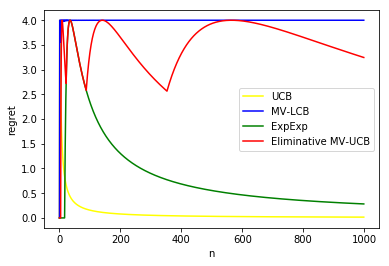

Text(0.5,0,'n')

Text(0,0.5,'cum regret')

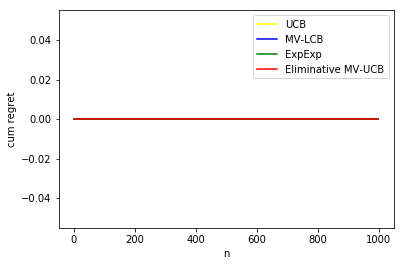

Text(0.5,0,'n')

Text(0,0.5,'optimal arm played percentage')

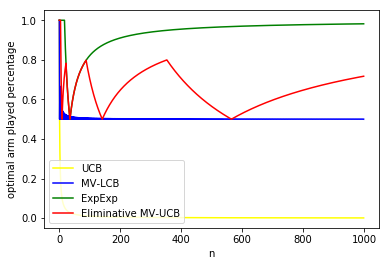

In [315]:
save = True
problem_id = "S"


import matplotlib.pyplot as plt
%matplotlib inline 

#Plot regret vs rounds
plt.plot(regret_avg_0, color = "yellow", label = "UCB")
plt.plot(regret_avg_1, color = "blue", label = "MV-LCB")
plt.plot(regret_avg_2, color = "green", label = "ExpExp")
plt.plot(regret_avg_3, color = "red", label = "Eliminative MV-UCB")
plt.xlabel('n')
plt.ylabel('regret')
plt.legend()
if save == True:
    plt.savefig('mv_' + problem_id + '_' + str(rho) + '_reg.png')
#plt.savefig('special_case_reg.png')
plt.show()

#Plot cum regret vs rounds
plt.plot(cum_regret_avg_0, color = "yellow", label = "UCB")
plt.plot(cum_regret_avg_1, color = "blue", label = "MV-LCB")
plt.plot(cum_regret_avg_2, color = "green", label = "ExpExp")
plt.plot(cum_regret_avg_3, color = "red", label = "Eliminative MV-UCB")
plt.xlabel('n')
#plt.ylim([0,80])
plt.ylabel('cum regret')
plt.legend()
if save == True:
    plt.savefig('mv_' + problem_id + '_' + str(rho) + '_cumreg.png')
plt.show()

#Plot percentage optimal vs rounds
plt.plot(perc_optimal_avg_0, color = "yellow", label = "UCB")
plt.plot(perc_optimal_avg_1, color = "blue", label = "MV-LCB")
plt.plot(perc_optimal_avg_2, color = "green", label = "ExpExp")
plt.plot(perc_optimal_avg_3, color = "red", label = "Eliminative MV-UCB")
plt.xlabel('n')
plt.ylabel('optimal arm played percentage')
plt.legend()
if save == True:
    plt.savefig('mv_' + problem_id + '_' + str(rho) + '_perc.png')
plt.show()